# Supplementary Tables

This notebook is to extract specific numbers about how well WALDO performs in relation to MWT

performance:
    
MWT: how many tracks in total?
MWT: how many track move > 1 bl?
WALDO: how many tracks in total?
WALDO: how many track move > 1 bl?

    
For waldo, how many of these operations are used?
consolidation/pruning/collision/infer arcs

In [40]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from __future__ import print_function, division
import six, sys
sys.path.append('..'); import pathcustomize, about
about.about()

import waldo

Python 2.7.9 (default, Apr 14 2015 12:54:25) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2, Host: cody


In [148]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from waldo.conf import settings
from waldo.wio.experiment import Experiment
from waldo import wio

plt.style.use('bmh')


## Grab data from filesystem

In [43]:
#settings.PROJECT_DATA_ROOT = '/Users/peterwinter/Data/waldo_out'
#settings.PROJECT_DATA_ROOT = '../../data/test/'
settings.PROJECT_DATA_ROOT = '/home/projects/worm_movement/Data/WALDO_Data/'


pl = pathlib.Path(settings.PROJECT_DATA_ROOT)
pl.absolute()

def grab_report_card(eid):
    path = pl / eid
    report_path = path / 'waldo' / '{eid}-report-card.csv'.format(eid=eid)
    report_path.exists()

    if not report_path.exists():
        report_card = None
        print('Warning: Report Card file not found for {eid}'.format(eid=eid))
        print(report_path)
    else:
        #print('report file found')
        report_card = pd.read_csv(str(report_path))
    return report_card

def data_from_summary_file(summary_file):
    recording_name = summary_file.name

    with open(str(summary_file)) as f:
        lines = f.readlines()
    last_line = lines[-1].split()
    last_time = float(last_line[1]) / 60.0 # file is in seconds, we use minutes
    
    data = {'name': recording_name.split('.summary')[0],
            #'summary_path': str(summary_file),
            '#worms':0,
            'total-minutes':round(last_time, ndigits=1)}    
    
    name_parts = recording_name.split('-')
    for part in name_parts:
        if 'worm' in part:
            p = part.split('worm')
            for i in p:
                #print(i)
                try:
                    data['#worms'] = int(i)
                    break
                except:
                    pass

    return data

not_a_dir = []
complete_runs = []
incomplete_runs = []
eid_data = {}
report_cards = {}
for i in pl.glob('*'):
    
    # if not a directory, dont bother
    if not i.is_dir():
        not_a_dir.append(str(i))
        continue
        
    # if no summary file, skip
    summary_list = list((i / 'blob_files').glob('*.summary'))
    if not summary_list:
        incomplete_runs.append(eid)
        continue
        
    # if no report_card, skip
    eid = i.parts[-1]
    report_card = grab_report_card(eid)
    if report_card is None:
        incomplete_runs.append(eid)
        continue
    
    datetime = eid.split('_')
    if len(datetime) != 2:
        continue
    date, time = datetime
    if date[:5] != '20150':
        continue

    summary_file = summary_list[0]
    complete_runs.append(eid)            
    eid_data[eid] = data_from_summary_file(summary_file)
    report_cards[eid] = report_card
        
organization_table = pd.DataFrame(eid_data).T
organization_table.sort
organization_table

/home/projects/worm_movement/Data/WALDO_Data/20150625_132449c/waldo/20150625_132449c-report-card.csv
/home/projects/worm_movement/Data/WALDO_Data/20150625_180236L/waldo/20150625_180236L-report-card.csv


,#worms,name,total-minutes
20150504_123807,0,copper-test2,180
20150505_111654,10,copper-A3-10worms-N2-same-plate,180
20150505_150046,10,copper-A3-10worms-N2-new-plate,180
20150506_115813,10,copper-A4-10worms-N2,180
20150506_153738,5,copper-A4-5worms-N2,180
20150507_103013,10,copper-A5-10worms-N2,180
20150507_144556,5,copper-A5-5worms-N2,180
20150508_105539,10,copper-A6-10worms-N2,180
20150511_121312,10,copper-10worms-N2-day1-standard,180
20150511_121317,10,copper-10worms-N2-day1-standard,180


## Manual Corrections

In [44]:
organization_table.loc['20150504_123807', '#worms'] = 5

In [45]:
rec = organization_table[organization_table['total-minutes'] > 60]
print(len(rec))
list(rec['name'])

83


['copper-test2',
 'copper-A3-10worms-N2-same-plate',
 'copper-A3-10worms-N2-new-plate',
 'copper-A4-10worms-N2',
 'copper-A4-5worms-N2',
 'copper-A5-10worms-N2',
 'copper-A5-5worms-N2',
 'copper-A6-10worms-N2',
 'copper-10worms-N2-day1-standard',
 'copper-10worms-N2-day1-standard',
 'copper-10worms-N2-day1-standard',
 'copper-30worms-N2-day1-populationtest',
 'copper-20worms-N2-day1-populationtest',
 'copper-10worms-N2-day1-populationtest',
 'copper-10worms-N2-day2-standard',
 'copper-10worms-N2-day2-standard',
 'copper-10worms-N2-day2-standard',
 'copper-60worms-N2-day2-populationtest',
 'copper-50worms-N2-day2-populationtest',
 'copper-40worms-N2-day2-populationtest',
 'copper-10worms-N2-day3-standard_B',
 'copper-10worms-N2-day3-standard_A',
 'copper-10worms-N2-day3-standard',
 'copper-10worms-N2-day3-standard',
 'copper-10worms-N2-day3-standard',
 'copper-10worms-N2-day4-standard_C',
 'copper-10worms-N2-day4-standard_B',
 'copper-10worms-N2-day4-standard_A',
 'copper-10worms-N2-day

#Volume of track generation

In [46]:
days = [(str(i).split('_')[0], str(i)) for i in rec.index]
days
counts = {}
for d, eid in days:
    if d not in counts:
        counts[d] = []
    counts[d].append(eid)

for c in counts:
    eids = counts[c]
    if len(eids) > 3:
        print(c)
        print(eids)

20150615
['20150615_124720', '20150615_124728', '20150615_124738', '20150615_170747', '20150615_170754', '20150615_170759']
20150629
['20150629_113741', '20150629_113757', '20150629_113803', '20150629_165904', '20150629_165915', '20150629_165920']
20150625
['20150625_132445', '20150625_132448', '20150625_132449', '20150625_180232', '20150625_180236', '20150625_180237']
20150608
['20150608_121717', '20150608_121725', '20150608_121812', '20150608_165515', '20150608_165523', '20150608_165610']
20150702
['20150702_113855', '20150702_113859', '20150702_150024', '20150702_150028']
20150514
['20150514_121513', '20150514_121515', '20150514_121528', '20150514_164158', '20150514_164204']
20150515
['20150515_124728', '20150515_124736', '20150515_124840', '20150515_155539', '20150515_155545']
20150512
['20150512_110456', '20150512_110519', '20150512_110526', '20150512_165039', '20150512_165044', '20150512_165052']
20150513
['20150513_112911', '20150513_112917', '20150513_144241', '20150513_144253'

In [47]:
def steps_from_node_report(experiment, min_bl=1):
    node_report = experiment.prepdata.load('node-summary')
    # print(node_report.head())
    steps = node_report[['bl', 't0', 'tN', 'bid']]
    steps.set_index('bid', inplace=True)

    steps.loc[:, 't0'] = steps['t0'] / 60.0
    steps.loc[:, 'tN'] = steps['tN'] / 60.0
    steps.loc[:, 'lifespan'] = steps['tN'] - steps['t0']
    steps.loc[:, 'mid'] = (steps['tN'] + steps['t0']) / 2.0
    return steps[steps['bl'] >= 1]


#experiment = wio.Experiment(experiment_id=ex_id)
#steps, durations = report_card.calculate_duration_data_from_graph(experiment, graph, moving_nodes)



ex_id = '20150504_161934' # 12 hour movie
def count_tracks_over_x(ex_id, hour_thresh=1.5):
    experiment = wio.Experiment(experiment_id=ex_id)
    final_steps = steps_from_node_report(experiment)['lifespan'] / 60.0 # rescale to hours
    long_count = len(final_steps[final_steps >= hour_thresh])
    return long_count

count_tracks_over_x(ex_id, hour_thresh=2)

17

In [48]:
for day, eids in counts.iteritems():
    print('\n', day)
    eids = sorted(eids)
    for eid in eids:
        try:
            print(eid, count_tracks_over_x(ex_id=eid, hour_thresh=1.5))
        except:
            print(eid, '-')


 20150615
20150615_124720 10
20150615_124728 9
20150615_124738 10
20150615_170747 8
20150615_170754 10
20150615_170759 10

 20150508
20150508_105539 10

 20150629
20150629_113741 19
20150629_113757 -
20150629_113803 -
20150629_165904 10
20150629_165915 -
20150629_165920 -

 20150625
20150625_132445 -
20150625_132448 -
20150625_132449 9
20150625_180232 -
20150625_180236 10
20150625_180237 -

 20150608
20150608_121717 17
20150608_121725 10
20150608_121812 20
20150608_165515 21
20150608_165523 29
20150608_165610 14

 20150505
20150505_111654 9
20150505_150046 7

 20150504
20150504_123807 5

 20150507
20150507_103013 5
20150507_144556 5

 20150506
20150506_115813 1
20150506_153738 2

 20150702
20150702_113855 0
20150702_113859 -
20150702_150024 -
20150702_150028 -

 20150514
20150514_121513 5
20150514_121515 6
20150514_121528 8
20150514_164158 7
20150514_164204 -

 20150515
20150515_124728 9
20150515_124736 3
20150515_124840 9
20150515_155539 9
20150515_155545 -

 20150512
20150512_110456

## Grab Important Information

In [49]:
def report_card_to_operation_metrics(report_card):
    rc = report_card[['phase', 'step', 'total-nodes']]
    rc['node_change'] = rc['total-nodes'].diff()
    operations = ['resolve collisions', 'prune', 'consolidate', 'infer gaps']
    operation_counts = {}

    for op in operations:
        r = rc[rc['step'] == op]
        count = np.abs(r['node_change'].sum())
        op_name = op.replace(' ', '-')
        operation_counts[op_name] = count
    #operation_counts['resolve-collisions'] = operation_counts['resolve-collisions'] / 3
    operation_counts['total-removed'] = np.sum(operation_counts.values())
    return operation_counts



def report_card_to_performance_metrics(report_card, worm_count = 10):

    # grab relevant rows
    MWT_row = report_card.iloc[0]
    WALDO_row = report_card.iloc[-1]

    # start calculating stats 
    metrics = {'MWT_total_tracks': MWT_row['total-nodes'],
               'MWT_moving_tracks': MWT_row['moving-nodes'],
               'WALDO_total_tracks': WALDO_row['total-nodes'],
               'WALDO_moving_tracks': WALDO_row['moving-nodes'],
               }
    
    metrics['worm_count'] = worm_count
    metrics['#interuptions'] = metrics['MWT_total_tracks'] - worm_count
    metrics['#interuptions_removed'] = metrics['MWT_total_tracks'] - metrics['WALDO_total_tracks']
    metrics['%interuptions_removed'] = int(round(100 * metrics['#interuptions_removed'] / metrics['#interuptions']))
    return metrics


report_card = report_cards.values()[0]
performance_metrics = report_card_to_performance_metrics(report_card)
print(performance_metrics)

operation_metrics = report_card_to_operation_metrics(report_card)
operation_metrics


{'WALDO_total_tracks': 71, '%interuptions_removed': 95, '#interuptions_removed': 1068, 'MWT_moving_tracks': 84, '#interuptions': 1129, 'MWT_total_tracks': 1139, 'worm_count': 10, 'WALDO_moving_tracks': 23}


/home/visitors/peterwinter/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


{'consolidate': 476.0,
 'infer-gaps': 42.0,
 'prune': 14.0,
 'resolve-collisions': 258.0,
 'total-removed': 790.0}

## Fold increase

In [50]:
# Fold increase in tracks > 50 min
a = []
for eid, report_card in report_cards.items():
    #print(report_card.head())
    l = {'before': report_card.loc[2]['>50min'],
         'after': report_card.loc[len(report_card) - 1]['>50min'],
         'eid':eid}
    a.append(l)
df = pd.DataFrame(a).set_index('eid')[['before', 'after']]
df['fold'] = df['after'] / df['before']

before = sum(df['before'])
after = sum(df['after'])
print('before', before)
print('after', after)
print(after/ before)

df.head()

before 417
after 1367
3.27817745803


,before,after,fold
eid,,,
20150625_180232,9,12,1.333333
20150625_180237,9,10,1.111111
20150625_180236,8,13,1.625000
20150512_110519,6,17,2.833333
20150512_110456,3,13,4.333333


In [87]:
# Filter out junk at this stage!

performance_data = []
operation_data = []

for eid, row in organization_table.iterrows():
    row_dict = row.to_dict()
    row_dict['id'] = eid
    
    report_card = report_cards[eid]
    if report_card is None:
        print('WARNING:', eid, 'has no report card')
        continue
    if row_dict['total-minutes'] < 60:
        continue
    
    performance_metrics = report_card_to_performance_metrics(report_card, worm_count=row['#worms'])
    operation_metrics = report_card_to_operation_metrics(report_card)
    operation_metrics['MWT_total_tracks'] = performance_metrics['MWT_total_tracks']
    operation_metrics['WALDO_total_tracks'] = performance_metrics['WALDO_total_tracks']

    
    if performance_metrics['%interuptions_removed'] > 100:
        continue
    
    performance_metrics.update(row_dict)
    operation_metrics.update(row_dict)
    performance_data.append(performance_metrics)
    operation_data.append(operation_metrics)
    
op_unformatted = pd.DataFrame(operation_data)
pf_unformatted = pd.DataFrame(performance_data)


print(len(op_unformatted))

82


/home/visitors/peterwinter/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Format Tables

In [88]:
op = op_unformatted.set_index('id')
op = op[['total-minutes', '#worms', 
         'MWT_total_tracks','WALDO_total_tracks', 'total-removed',
         'prune', 'consolidate', 'resolve-collisions', 'infer-gaps', 
         ]]


columns = [np.array([ u'basics', u'basics',
                     u'total tracks', u'total tracks', 'total tracks',
                     u'operations', u'operations', u'operations', u'operations',
                     ]),
           
            np.array([u'total-minutes', u'#worms', 
                      u'MWT', u'WALDO', 'difference',
                      'prune', 'consolidate', 'resolve-collisions', 'infer-gaps'])]

o = pd.DataFrame(np.array(op), columns=columns, index=op.index)

#op.to_html('table_of_network_operations.html')
o.to_latex('table_of_network_operations.tex', longtable=True)
o

basics        total tracks                  operations  \
                total-minutes #worms          MWT WALDO difference      prune   
id                                                                              
20150504_123807           180      5          698    13        291          0   
20150505_111654           180     10          677    13        483          1   
20150505_150046           180     10         1964    51       1499          6   
20150506_115813           180     10         3175   204       2833         64   
20150506_153738           180      5          579    24        447         15   
20150507_103013           180     10         2367    67       2278          8   
20150507_144556           180      5          411    10        389          5   
20150508_105539           180     10          990    39        949          5   
20150511_121312           180     10         1123   101        899          0   
20150511_121317           180     10         1075    27        812          0   
20150511_121322           180     10         1334    35       1289          0   
20150511_160114           180     30         8650   257       8393          9   
20150511_160118           180     20         3594   104       3474          0   
20150511_160123           180     10         1857    74       1763          3   
20150512_110456           180     10         3273    40       2216          0   
20150512_110519           180     10          852    34        817          0   
20150512_110526           180     10          860    47        747          4   
20150512_165039           180     60        33940  2653      31270         34   
20150512_165044           180     50        28642  2760      25831         32   
20150512_165052           180     40        13715   907      12759         19   
20150513_112911           180     10         1299    38       1201          8   
20150513_112917           180     10         1705    64       1287          2   
20150513_144241           180     10        10611    66       1173          2   
20150513_144253           180     10         1371    72       1230          2   
20150513_144302           180     10          740    37        668          3   
20150514_121513           180     10         1041    55        982          0   
20150514_121515           180     10         1132    26        898          1   
20150514_121528           180     10          857    50        711          2   
20150514_164158           180     10          838    36        733          1   
20150514_164204           180     10         1454    41        810          1   
...                       ...    ...          ...   ...        ...        ...   
20150608_165610           180     20         2824    93       1932          1   
20150615_124720           180     10          666    25        603          1   
20150615_124728           180     10          984    21        907          0   
20150615_124738           180     10         2139    47       2053          0   
20150615_170747           180     10         1234    38       1192          1   
20150615_170754           180     10         1116    22       1094          1   
20150615_170759           180     10          661    17        644          1   
20150622_121933           180     40         8204   232       7802          0   
20150622_121935           180     20         2810    58       2709          3   
20150622_121940           180     60        19103   808      18076          4   
20150625_132445           180     10         1560    19       1537          1   
20150625_132448           180     10          868    34        789          0   
20150625_132449           180     10         1123    45        991          1   
20150625_180232           180     10         1139    71        790         14   
20150625_180236           180     10          852    17        835          0   
20150625_180237           180     10         1409    2

In [89]:
pf = pf_unformatted.set_index('id')
pf = pf[['total-minutes', '#worms', 
         'MWT_total_tracks', 'WALDO_total_tracks',
         'MWT_moving_tracks', 'WALDO_moving_tracks',
         '#interuptions', '#interuptions_removed', '%interuptions_removed']]

columns = [np.array([u'basics', u'basics',
                     u'total tracks', u'total tracks', 
                     u'moving tracks', u'moving tracks',
                     u'interuptions', u'interuptions', u'interuptions']),
           
            np.array([u'total-minutes', u'#worms', 
                      u'MWT', u'WALDO', 
                      u'MWT', u'WALDO',
                     u'MWT', u'number removed', u'percent removed'])]
p = pd.DataFrame(np.array(pf), columns=columns, index=pf.index)
p.to_html('table_of_waldo_performance.html')
p.to_latex('table_of_waldo_performance.tex', longtable=True)
p

basics        total tracks       moving tracks        \
                total-minutes #worms          MWT WALDO           MWT WALDO   
id                                                                            
20150504_123807           180      5          698    13            26     5   
20150505_111654           180     10          677    13            67    13   
20150505_150046           180     10         1964    51           267    38   
20150506_115813           180     10         3175   204           391    90   
20150506_153738           180      5          579    24            93    19   
20150507_103013           180     10         2367    67           309    46   
20150507_144556           180      5          411    10            85     5   
20150508_105539           180     10          990    39           155    25   
20150511_121312           180     10         1123   101           167    69   
20150511_121317           180     10         1075    27            93    27   
20150511_121322           180     10         1334    35           143    22   
20150511_160114           180     30         8650   257           847   176   
20150511_160118           180     20         3594   104           374    86   
20150511_160123           180     10         1857    74           167    38   
20150512_110456           180     10         3273    40           173    25   
20150512_110519           180     10          852    34           171    32   
20150512_110526           180     10          860    47           195    33   
20150512_165039           180     60        33940  2653          1387   761   
20150512_165044           180     50        28642  2760          2005   895   
20150512_165052           180     40        13715   907          1692   523   
20150513_112911           180     10         1299    38           241    32   
20150513_112917           180     10         1705    64           329    53   
20150513_144241           180     10        10611    66           315    40   
20150513_144253           180     10         1371    72           281    62   
20150513_144302           180     10          740    37           191    29   
20150514_121513           180     10         1041    55           265    41   
20150514_121515           180     10         1132    26           141    25   
20150514_121528           180     10          857    50           201    26   
20150514_164158           180     10          838    36           129    21   
20150514_164204           180     10         1454    41           214    35   
...                       ...    ...          ...   ...           ...   ...   
20150608_165610           180     20         2824    93           242    67   
20150615_124720           180     10          666    25           105    23   
20150615_124728           180     10          984    21            71    17   
20150615_124738           180     10         2139    47            95    32   
20150615_170747           180     10         1234    38           136    31   
20150615_170754           180     10         1116    22            97    17   
20150615_170759           180     10          661    17           121    12   
20150622_121933           180     40         8204   232           765   176   
20150622_121935           180     20         2810    58           255    50   
20150622_121940           180     60        19103   808          1228   392   
20150625_132445           180     10         1560    19            58    14   
20150625_132448           180     10          868    34           100    31   
20150625_132449           180     10         1123    45           101    31   
20150625_180232           180     10         1139    71            84    23   
20150625_180236           180     10          852    17           101    13   
20150625_180237           180     10         1409    24            66    13   
20150626_111855           180     40        19319   949           785   2

# Specific Paper Questions

In [90]:
# Abstractdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAEACAYAAACtVTGuAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXlYVdX6xz8LQUE9yEEFQUBUNEVzyCEREdC0azfNWw7g3GxlacMvtRzILIfMrG7dtEHR1NTKLmqapqKYluU8mwOaiiMIOIAI7+8PYF8Ok6AcOdD6PM9+ZK29hnfv49nvWWvt9X6ViKDRaDQaTUHYlbYBGo1Go7FttKPQaDQaTaFoR6HRaDSaQtGOQqPRaDSFoh2FRqPRaApFOwqNRqPRFIpVHYVSarhSao9Saq9SanhWnqtSao1S6rBSarVSysWaNmg0Go3mzrCao1BKNQWeAtoAzYGHlVL1gVHAGhFpCKzNSms0Go3GRrHmiKIR8JuIpIhIOrABeAzoAURmlYkEelrRBo1Go9HcIdZ0FHuBoKyppsrAQ4AX4C4i57LKnAPcrWiDRqPRaO4Qe2s1LCIHlVJTgNXAVWAnkJ6rjCildAwRjUajsWGs5igAROQr4CsApdQ7wCngnFKqloicVUp5AOfzq6sdiEaj0dweIqJKsj1rv/XklvWvD/AosACIAgZnFRkM/FBQfREps8f48eNL3Ya/o+3a/tI/tP2le1gDq44ogG+VUtWBNOB5EUlUSk0GFiulngRigT5WtqFUiI2NLW0TbpuybDto+0sbbX/5w9pTTx3zyYsHHrBmvxqNRqMpOfTObCsxZMiQ0jbhtinLtoO2v7TR9pc/lLXmtO4UpZTYqm0ajUZjqyilkBJezLb2GsXflujoaEJCQkrbjGKhVIn+39JoNFbmbv2Y1o5CY4EexWk0ZYO7+cNOTz1pDLKGrKVthkajKQIFfV+tMfVk04vZyk6h7BS1vWqXtikajUbzt8WmHQVjgBBIl4zStqTYREdHl7YJGo1GUyLYtqOogK1bqNHcFnZ2drz22mtGetq0abz11ltW7dPX15devXoZ6W+//ZbHH3/cqn1qygf6MWwlytobT5q7S8WKFVm6dCmXLl0C7t7C5Pbt2zlw4MBd7VNT9tGOQqMpBRwcHHjmmWf44IMP8pyLjY2lU6dONG/enAceeIC//voLyNwINnz4cAIDA6lfvz7fffedUee9996jbdu2NG/enIiIiHz7VErx6quv8s477wCWb7jFx8fTs2dPmjdvTkBAAHv27AEgIiKCJ554gtDQUOrXr8/HH39s1Pn666+5//77admyJUOHDiUjo+xNEWuKhnYUVkKvUWhuxfPPP8/8+fNJSkqyyH/xxRd5/PHH2bVrF/379+ell14yzp09e5ZffvmF5cuXM2pUpjjk6tWrOXLkCFu3bmXHjh1s27aNmJiYfPvs3bs327dv5+jRoxb548ePp1WrVuzatYt3332XQYMGGecOHz7M6tWr2bp1K2+99Rbp6ekcOHCAxYsXs3nzZnbs2IGdnR3z588vqVujsTH0PgqNppQwmUwMGjSIjz76CCcnJyP/119/5YcfMoMqDxgwgNdffx3IHBH07JkpCNm4cWPOncvU/1q9ejWrV6+mZcuWAFy9epUjR44QFBSUp88KFSrwf//3f0yaNIlu3boZ+b/88gvff/89AKGhoVy6dInk5GSUUvzzn//EwcGB6tWr4+bmxtmzZ1m7di3btm2jdevWAFy/fp1atWqV9C3S2AjaUVgJvUahKQojRozgvvvuy7OoXNB+looVK+ZbZvTo0TzzzDO37E8pxcCBA5k0aRJNmzYtdp8VKlTg5s2bAAwePJh33333ln1qyj566kmjKUXMZjN9+vThyy+/NBaX27dvzzfffAPA/Pnz6dgxTxBmCx588EG++uorrl69CsDp06e5cOECAJ07dyYuLs6ivL29PS+//DLTp083+gwKCjKmjqKjo6lZsyYmk6nADV2dO3fm22+/NfqJj4/n5MmTt3sbNDaOdhRWQq9RaAoj5xtHr776KhcvXjTSH3/8MbNnz6Z58+bMnz+fDz/8MN962X936dKFfv36ERAQQLNmzejduzdXrlwhIyODo0eP4urqmqfuk08+SXr6/5SJIyIi2LZtG82bN+eNN94gMjLSqJPf21GNGzdm4sSJdO3alebNm9O1a1fOnj17p7dFY6PYdAgPIoAYcD9Qi7On425VxaYoq0EBbfX/g6b47Nu3j9mzZzNt2rTSNkVjBe5mCA+rOgql1GhgAJAB7AEeB6oAi4A6ZCncicjlfOqWaUdRFtGOQqMpO5SLWE9KKV/gaeA+EbmXzH3WYcAoYI2INATWZqU1Go1GY6NYc40iiUyt7MpKKXugMnAG6AFEZpWJBHpa0YZSQ69RaDSa8oLVHEWWNvb7wEkyHcRlEVkDuIvIuaxi5wB3a9mg0Wg0mjvHavsolFL1gRGAL5AILFFKDchZRkREKVXwpPhSIAmuJCUzY8YMWrRoYSwQZ/9it9V0dp6t2FPUtEajKVtER0czZ84cIDPwozWw2mK2Uqov0EVEnspKDwTaAZ2AUBE5q5TyANaLSKN86uvF7LuMXszWaMoO5WIxGzgItFNKOanMF7EfAPYDy4DBWWUGAz9Y0YZSQ/9C12g05QVrrlHsAuYCfwC7s7JnAZOBLkqpw2SOLiZbywZN+WL06NHG5rPo6Gi8vb1LvI+HHnqIefPmlXi7d4shQ4YwduzYEmnr5MmTBe7OLi1SU1Np3LixxQZFjfWx6s5sEZkqIk1E5F4RGSwiaSISLyIPiEhDEema3x6K8kBZ22yXH9m7cq15FJULFy4wb948hg4dasUrhh9//JGBAwdarX1fX1/WrVtntfLFva+F4ePjYwQGvFMiIiJK5L5WqlSJJ554gsmT9e/Lu4kO4aG5BWLFo+jMmTOHf/7zn1SqVOmOr6g0Ke460O2sG9nSCMAahIeHExkZSVpaWmmb8rdBOworodcoSpZVq1YRHBycJ3/SpEnUrFmTunXrsmDBAiN/xYoVtGzZkmrVquHj42MhM5qSksKAAQOoUaMGZrOZtm3bGsHtQkJC+PLLL42yn3/+Of7+/jg7O9OkSRN27NgBwJQpU/Dy8sLZ2ZlGjRoV6Vf/wIEDOXnyJN27d8dkMhmhNaKiomjSpAlms5nQ0FAOHjxYaPnevXvj4eGBi4sLwcHB7N+/v8j30dfXl2nTptGsWTNMJhNPPvkk586do1u3blSrVo0uXbpw+XLmID82NhY7OztDkCgkJIRx48bRoUMHnJ2defDBBw2FvvymAn19fVm7di2rVq1i0qRJLFq0CJPJZIRDT0xM5Mknn8TT0xMvLy/Gjh1r9HXkyBGCg4NxcXGhZs2ahIWFGe16eXlhNpvZsmVLka9bc4eIiE0egBCB0Blx96wlZY3169eXtgnFJvO/g2UaxIoHBViSl5o1a8off/xhpNevXy/29vby6quvyo0bN2TDhg1SpUoVOXTokIiIREdHy969e0VEZPfu3eLu7i4//PCDiIh89tln0r17d7l+/bpkZGTI9u3bJSkpSUREQkJC5MsvvxQRkcWLF0vt2rWNfo8ePSonTpyQgwcPire3t8TFxYmIyIkTJ+To0aNFug5fX19Zu3atkT506JBUqVJFfv75Z7l586ZMnTpV/Pz8JC0tLd/yIiKzZ8+WK1euyI0bN2TEiBHSokUL49yQIUNkzJgxhfYfEBAg58+fl9OnT4ubm5u0bNlSdu7cKSkpKdKpUyd56623RETk+PHjopSS9PR0EREJDg4WPz8/+fPPP+X69esSEhIio0aNMj4PLy+vAq81IiJCBg4caHG+Z8+eMnToULl27ZqcP39e2rZtKzNnzhQRkbCwMHn33XdFRCQ1NVV++eUXi7o9evSQjz76qLBbXe4p6PuTlV+iz2M9orAS5WGNwpa4fPkyJpMpT/7bb7+Ng4MDHTt25J///CeLFy8GIDg4mCZNmgBw7733EhYWxoYNG4BMfYVLly7x559/opSiZcuW+bb9xRdfMHLkSFq1agVAvXr18PHxoUKFCqSmprJv3z7S0tLw8fGhXr16t3VdixYt4uGHH6Zz585UqFCB1157jevXr7N58+YC6wwZMoQqVarg4ODA+PHj2bVrF8nJyUXu88UXX6RmzZp4enoSFBREQEAAzZs3p1KlSvzrX/8yRk25UUrx+OOP4+fnh6OjI3369GHnzp1F6jP7gZPNuXPnWLlyJR988AFOTk7UrFmTESNGGOHVK1asSGxsLKdPn6ZixYq0b9/eoj2TyWSMfDTWRzsKTZnAbDbneRiazWYLZbg6depw5swZAH777TdCQ0Nxc3PDxcWFmTNnGtMkAwcO5MEHHyQsLIzatWszcuRIQ4wnJ6dOnaJ+/fp58v38/JgxYwYRERG4u7sTHh6eR/OhqMTFxeHj42OklVJ4e3tz+vTpfMtnZGQwatQo/Pz8qFatGnXr1gWweAsoe/G5W7dumEwmTCYTCxcuNM67u/8vGIKTk5NF2tHRkStXrhRob04VOycnp0LLFsaJEydIS0vDw8MDs9mM2Wxm6NChxhTg1KlTERHatm1L06ZNmT17tkX95ORkzGbzbfWtKT7aUVgJvUZRsjRr1oxDhw5Z5CUkJHDt2jUjfeLECWrXrg1Av3796NmzJ6dOneLy5csMHTrUmP+2t7dn3Lhx7Nu3j82bN7N8+XLmzp2bp09vb2+OHDmSrz3h4eHExMRw4sQJlFKMHDmySNeR+w0iT09PTpw4YaRFhL/++su4jtzl58+fT1RUFGvXriUxMZHjx48b9XK2AbBy5UqSk5NJTk4mPDy8QJty1r1dqlSpYvFZpKenGw/9/K7D29ubSpUqcenSJRISEkhISCAxMZE9e/YAmc5s1qxZnD59mpkzZ/L8889z7Ngxo/6BAwdo3rz5HdutKRraUWjKBA899JAxdZST8ePHk5aWRkxMDCtWrKB3794AXLlyBbPZTMWKFdm6dSsLFiwwHlbR0dHs2bOH9PR0TCYTDg4OVKhQIU/bTz31FNOmTWP79u2ICEeOHOHkyZMcPnyYdevWkZqaSqVKlXB0dDTqR0dHY2dX8NfK3d2do0ePGuk+ffqwYsUK1q1bR1paGu+//z6Ojo7GVEvu8leuXKFSpUq4urpy9epV3njjDYv2S+KhXxgFtd+wYUNSUlL48ccfSUtLY+LEiaSmphrna9WqRWxsrFHfw8ODrl278sorr5CcnGyILG3cuBGAJUuWcOrUKQBcXFxQShn39fTp08THx9OuXTtrXqomB2XCUVy/dr20TSg25WeNQlnxKDqDBg3ixx9/JCUlJdMqpYxpC09PTwYOHMjMmTNp2LAhAJ9++injxo3D2dmZt99+m759+xptnT17lt69e1OtWjX8/f0JCQnJ9x3/Xr168eabb9KvXz+cnZ159NFHSUhIIDU1ldGjR1OzZk08PDy4ePEikyZNAuCvv/4iMDCwwOsYPXo0EydOxGw2M336dBo2bMjXX39trBusWLGCZcuWYW9vn2/5QYMGUadOHWrXrk3Tpk0JCAjIo3pX3H0PhdXP3VZBZatVq8ann37KU089hZeXF1WrVrV4CyrbgVevXp3WrVsDMHfuXG7cuIG/vz+urq707t3bUMn7448/aNeuHSaTiUceeYSPPvrIiGO0YMEChgwZgoODQ7GuU3P7lAmFuypbK3Ml6Wppm1TusfVYT2+++SZubm4MHz68tE0pkKeffpo+ffrQpUuX0jalXJKamkqLFi2IiYmhRo0apW1OqVJuFO7uhLLuKLQUqkajsSblJSigRqPRaMoB2lFYibI2mtBoNJqC0I5Co9FoNIWiHYWV0PsoNBpNeUE7Co1Go9EUinYUVkKvUWg0mvKCVR2FUuoepdSOHEeiUuolpZSrUmqNUuqwUmq1UsrFmnZoNBqN5vaxtsLdIRFpKSItgVbANWApMApYIyINgbVZ6QJJS8sbsM3W0WsUJY+WQrUd7r///mLpYGjKNndz6ukB4IiI/AX0ACKz8iOBnoVVFDKsbJomP7QUqnVp27YtR44c4dixY0Yo87LCa6+9xrhx40rbDM1dwv4u9hUGZMc6dheRc1l/nwPc869Sdik3axQRttF2eZFCzSYtLY2TJ0/i5+fHkiVLrO4osnfwlpSedvfu3Rk6dCjnzp2zCFOuKZ/clRGFUqoi0B1YkvtctiJTvhWXAscgPS2dGTNmWEznREdH63QJp22Z8iCFmpO9e/fi7+8PZAbAy5YHBZg9ezY9evQw0g0aNKBPnz5G2tvbm927dwOwefNm2rRpg4uLC23btrWQBw0JCWHMmDEEBgZStWpVjh07hp2dHf/5z39o0KABzs7OjBs3jqNHjxIQEICLiwthYWGGFvXFixd5+OGHMZvNVK9enY4dOxoOx9HRkVatWvHTTz8V67o1JU90dDRDhgxhyJAhREREWKeTkpbMy+8AHgFW5UgfBGpl/e0BHMynjiGF6uBoX6gkoC1SbqRQI6x4/A2lUGfPni0uLi5SuXJlcXJyEhcXF7G3txeTySRms1liY2Pl2LFj4uLiIiIip0+fljp16oi3t7dhg9lsFhGRS5cuiYuLi3z99deSnp4uCxcuFLPZLPHx8SKSKV1ap04d2b9/v6Snp8uNGzdEKSU9e/aU5ORk2bdvn1SsWFFCQ0Pl+PHjkpiYKP7+/hIZGSkiIqNGjZKhQ4fKzZs35ebNm7Jp0yaLa3nppZfklVdeKfJnqClZCvr+UIalUMP537QTQBQwOOvvwcAPd8kOTRmlvEihDhkyhISEBFq1asWWLVvYtWsXTZs2JSkpifj4eOrUqUPdunUxmUzs2LGDjRs38uCDD+Lp6cmhQ4fYsGEDHTt2BDJHTffccw/9+/fHzs6OsLAwGjVqRFRUFJA5zTRkyBAaN26MnZ2dEZb79ddfp2rVqvj7+3PvvffSrVs3fH19cXZ2plu3bsaoqWLFisTFxREbG0uFChXyhE/XcqR/H6zuKJRSVchcyP4+R/ZkoItS6jDQKStdrig3axQ2QnmQQo2Pj8fFxQUXFxc2b95MSEgIjRo14tChQ5jNZuONLsh0dNHR0cTExBAcHExwcDAbNmxg48aNxhTcmTNnLGRUc98DIN83wwqTQs0pb/p///d/+Pn50bVrV+rXr8+UKVMs2klKStJypH8TrO4oROSqiNQQkeQcefEi8oCINBSRriKif5ZoCqU8SKG6urpy+fJlZs6cydNPP01CQgL/+Mc/WL58OQkJCRY6G8HBwaxfv56YmBhCQkIMx7FhwwbDUdSuXdtCRjX3PYA7W7yuWrUq06ZN4+jRo0RFRTF9+nSLtRgtR/r3Qe/MthK2vjhc1igvUqiQuXh93333AbBjx45833jKdhQpKSl4enrSoUMHVq1aRXx8vLHw/dBDD3H48GEWLlzIzZs3WbRoEQcPHuThhx822pEi6IvkLJPz7+XLl3PkyBFEBGdnZypUqGBcZ0pKCtu3b9cCTX8T7ubrsZqySERpG5DJoEGDaNGiBSkpKTg6OuaRQq1SpUoeKdRXX32VYcOGERwcTN++fY359LNnzzJ06FBOnTpF1apVCQsLK1AK9dKlS/Tr14/Tp09Tt25d5s2bh52dHaNHj+bAgQM4ODgQGBjIrFmzgFtLoQJs376dsLAwLl26hL29PdWqVctTpkGDBphMJoKCggBwdnamfv36uLm5GQ7P1dWV5cuXM3z4cJ577jkaNGjA8uXLcXV1NdopTMo0v7yc+1uOHDnCiy++yIULFzCbzbzwwgvGaGbZsmWEhoZSq1atQq9VUz4oEwp3Dr/Yc+N6WmmbVO6xdYU7LYVqO7Rr146vvvrKeMVXc/fRUqhoR1Ea2Lqj0Gg0/0NLoZYD9BqFRqMpL2hHodFoNJpC0Y7CSuh9FBqNprygHYVGo9FoCkU7Ciuh1yg0Gk15QTsKjUaj0RSKdhRWQq9RaDSa8oJ2FJoyQ04p1LuBnZ0dx44du2v92UrfJcm///1vRo0qVOlYUwYoE44i/WZ6aZtQbMrDGoUtS6EWVzO7pDW2cwsclQXs7Oxwd3cnPf1/36e0tDTc3NyM+FQLFy7Ms9u6S5cu+eZNmTIFk8lkHHZ2dlSuXNlIL1y4kKeffpr58+cbwlCaskmZcBRQopsMNcVArHgUB1uTQr2Vk8svbLkt4OrqysqVK430ypUrcXV1Na6nY8eOHDx40AjJfvPmTXbt2kVKSgoXL1408n799VeCg4NJTk42jjp16rB8+XIjHR4eTqVKlejWrVu+0Xk1ZYcy4ijKHnqNomTJKYV69epVunXrxpkzZzCZTDg7O3P27FlSU1MZMWIEtWvXpnbt2rz88svcuHGjwPJbt24lICDACCz44osvGjKghfHmm28SExPDsGHDMJlMvPTSS0DmL/ZPP/2UBg0acM899wAwfPhwfHx8qFatGq1bt2bTpk1GOxkZGbz77rv4+fnh7OxM69atOX36dJ7+Nm3ahI+PDxs3bgTg5Zdfxt3dnWrVqtGsWTP27dtX5Ps4cOBAi4f23LlzGTRokBEKonbt2tSrV8+I1Lt9+3aaNm1KcHCw0f/27dvJyMigTZs2ReozJCSEFStWFNlGjQ1S0pJ5JXWQQwrVzt6ucE1ATYlAPlKoYsUjd3+FkVsKNTo6Wry8vCzKjB07VgICAuTChQty4cIFad++vYwdO7bA8tu2bZPffvtN0tPTJTY2Vho3biwzZswwziulCpQ4zSmZmrN8165dJSEhQVJSUkRE5Ouvv5b4+HhJT0+X999/X2rVqiWpqakiIjJ16lS599575fDhwyIismvXLrl06ZJF3ytXrhRvb2/5/fffRURk1apV0qpVK0lMTBQRkYMHDxqSrLdCKSV79+4Vd3d3SUxMlPj4eHF3d5e9e/eKUsoo9/jjj8vw4cNFROS9996TcePGyeeff26R17lz5zzt+/r6ytq1a/Pkb9u2TVxdXYtko6boFPT9oSxKoSqlXJRS3yqlDiil9iul7ldKuSql1iilDiulViulXKxtx92mPKxR2BK5pVAln2BoCxYsYNy4cdSoUYMaNWowfvx45s2bV2D5++67j7Zt22JnZ0edOnV45pln8tW8KIj82hw9ejQuLi7GFFn//v0xm83Y2dnxyiuvkJqaaggwffHFF7zzzjs0aNAAyBRnyhkifNGiRQwdOpRVq1bRunVrIFOeNDk5mQMHDpCRkcE999xTrFDfjo6OdO/enW+++YZFixbxyCOP4OjoaFEm5+ghJiaGjh07EhQUZJGXPborCiaTicTExCKX19ged2Pq6UPgRxFpDDQDDgKjgDUi0hBYm5XWaAokPynU3Jw5c4Y6deoYaR8fHwtZ0NwcPnyYhx9+GA8PD6pVq8abb75pzM0XhfzWKXIvmE+bNg1/f39cXFwwm80kJiYac/0FSa1m89FHH9G3b1+LheTQ0FCGDRvGCy+8gLu7O88+++wt70tumwcNGkRkZCTz5s2zmHbKJigoiN27d3P58mV+++03AgICuOeee4iLi+Py5cv88ssvhm53UUhOTs5Xc0NTdrCqo1BKVQOCROQrABG5KSKJQA8gMqtYJNDTmnaUBnqNomTJLYWa30Pa09OT2NhYI33y5Ek8PT0LLP/cc8/h7+/PkSNHSExM5J133jHkUm9FQYvZOfNjYmJ47733WLJkCZcvXyYhIYFq1aoZD+bCpFYBlixZwtKlS/noo48s8l988UX++OMP9u/fz+HDh3nvvfeKZHM2QUFBnD17lvPnz+crslSvXj08PT2ZNWsWPj4+VK5cGYCAgABmzpzJlStXaNeuXZH7O3DgAC1atCiWjRrbwtojirrABaXUbKXUdqXU50qpKoC7iJzLKnMOcC+4CY0mrxSqu7s7ly5dIikpycgLDw9n4sSJXLx4kYsXLzJhwgRDuS6/8leuXMFkMlG5cmUOHjzIf/7znyLb4+7uztGjRwstk5ycjL29PTVq1ODGjRtMmDDBov+nnnqKsWPHGnKju3fvJj4+3jjv6enJ2rVr+fDDD/nss8+ATBnV3377jbS0NCpXrmwhwzpnzhzq1q1bJPuXLVtGVFRUgeeDgoKYPn26xcihQ4cOTJ8+nTZt2hTr7bMNGzbQrVu3IpfX2CAlveiR8wBaA2lAm6z0DOBtICFXufh86grNEeoiKOSDDz6Q9evXGws269evt+l0WbN3/fr1+S5mW/soKhcvXhQvLy+5fv26kffEE09I9erVxWw2S1xcnKSkpMhLL70kHh4e4uHhIcOHDzcWjvMrv3HjRmnUqJFUrVpVgoKCZNy4cRIUFGSUt7OzK3Axe8uWLdKwYUMxm83GIm/uxe/09HR54oknxNnZWTw8PGTq1KlSt25dY8E3PT1dJk6cKHXr1hWTySRt27aV06dP5+n7+PHjUqdOHfnyyy9l7dq10qxZM6latarUqFFDBgwYIFevXhURkQkTJsiAAQMKvIcFXc+ff/4pdnaWL4zMnDlT7OzsZOnSpUbe1q1bRSklb7zxRr7t57eYff36dfHy8pLz588XaJfm9sj+/qxfv14GDx4sgwcPlvHjx1tlMduqCndKqVrAFhGpm5XuAIwG6gGhInJWKeUBrBeRRrnqGgp3dhvsSE8rW5vuoqOjy9z0k60r3JUFKdTS5MEHH+Sjjz4yXs21Bf79739z6tQpJk+eXNqmlDvKlRSqUmoj8JSIHFZKRQCVs05dEpEpSqlRgIuIjMpVr0w7irKIrTsKjUbzP+6mo7AvycYK4EVgvlKqInAUeByoACxWSj0JxAJ97oIdGo1Go7kNrO4oRGQXkN8Wzges3XdpUhannjQajSY/dAgPjUaj0RSKdhRWQo8mNBpNeUE7Co1Go9EUinYUVkLHetJoNOUF7Sg0Go1GUyjaUVgJvUZR8mgp1L8Xu3fvzjcWlebuox2FpkC0FGrBlDUp1GeffZbnn3/eSKelpVGlSpV887Zu3WrkDRkyBAcHB86ePWvRXkREhBFHKze+vr5UrlwZZ2dnzGYzgYGBzJw5M8/msM2bN9OpUyecnZ1xcXGhR48eHDhwwDjfrFkzXFxcWL58+R1XD+LRAAAgAElEQVRdu+bOuRsb7v6WlJt9FOvXW6/t0NAiFy2LUqj29rbz9QoODubdd9810n/88Qd16tQhJibGIk8pRatWrYBMJcHvvvsOf39/vv76a1577TWjbGHXr5Ri+fLldOrUieTkZKKjoxk+fDi//fYbX331FQBbtmzhwQcf5N1332XZsmXcuHGD6dOnExgYyLZt24zghv3792fmzJk8/PDDJXo/NMVDjyg0ZQIthXpnUqhBQUEcOHDAiE67adMmwsLCuHr1qqHBERMTQ/v27Y1otN999x1169bl9ddfJzIy0qK9ooZ6MZlMdO/enUWLFhEZGcn+/fsBeP311xk8eDAvvvgiVapUwWw28/bbb9OuXTsiIiKM+sHBwaxdu7ZIn4vGemhHYSXKxWjChtizZ4/x8K1SpQqrVq3C09OT5ORkkpKSqFWrFu+88w5bt25l165d7Nq1i61btzJx4sQCy9vb2/Phhx9y6dIltmzZwtq1a/n0009vacs777xDUFAQn3zyCcnJyRZ6Ef/973/5/fffjQdi27Zt2bVrFwkJCfTr14/evXtz48YNAN5//32++eYbVq5cSVJSEl999RVOTk4Wfa1atYp+/frx/fff07FjR3766SdiYmL4888/SUxMZMmSJVSvXv2WNnt7e1uMIDZu3EhQUBDt27e3yMsZVjwyMpK+ffvSo0cPjhw5wvbt22/ZT0G0adMGLy8vYmJiuHbtGlu2bKF37955yvXp04c1a9YY6dq1a+Pg4GChRaK5+2hHoSkTaCnUO5dCDQ4OZsOGDYiIMZrKljgVETZv3myM2k6ePEl0dDS9e/fGZDLx4IMPMnfu3CLfm/zw9PQkPj6e+Ph4MjIy8PDwyFOmVq1ahgJgNiaTicuXL99R35o7QzsKK6H3UZQsWgo1kzuRQu3YsSMbN25kz5491KtXD0dHRwIDA42869evc//99wMwb948mjZtSsOGDQHo3bs3CxYsID399qM4nzp1CldXV1xdXbGzsyMuLi5Pmbi4OGrUqGGRl5ycjIuLy233q7lztKPQlAm0FOr/uF0p1KCgIHbt2sWKFSsICgoCoEmTJvz111+sWLGCNm3aULFiRQDmzp3Ln3/+iYeHBx4eHowYMYKLFy+yYsWKIvWVm99//50zZ87QoUMHKleuTEBAAIsXL85TbvHixTzwwP/ihZ4+fZobN27YlMbG3xHtKKyEXqMoWbQU6p1Lofr5+eHm5saHH35orEUopbj//vv58MMPjWmnLVu2cOzYMX7//XdjvWfv3r3069fPYvopIyOD1NRUUlJSSElJITU11TiX7QyTkpJYvnw54eHhDBw4kCZNmgAwefJkIiMj+fjjj0lOTiYhIYExY8bw22+/MX78eKOdDRs20LlzZxwcHAq91xorU9KSeSV1AEIEQmfEzt5SplFjHdBSqOVaClVEJDw8XCpUqCDx8fFG3tSpU8XOzk5Wr14tIiJDhw6VXr165am7detWcXR0lPj4eImIiBCllMXh7e0tIpmSqE5OTmIymaRatWrSvn17+fTTTyUjI8OivU2bNklISIhUrVpVnJ2d5eGHH5Z9+/ZZlHnooYdk2bJlhV7T35WCvj+UNSlUAKVULJAEpANpItJWKeUKLALqkCVcJCKXc9Ur0wp3ZXEfha0r3Gkp1MKxRSnUO2H37t0899xz/PLLL6Vtik1iU1KoWbrX7wC1ReQfSil/IEBEirQtVSl1HGglIvE58qYCF0VkqlJqJGCWciaFqh2FRqOxJnfTURRljWIOsBrwzEr/CbxczH5yG90DyN7BEwn0LGZ7Nk9ZcxIajUZTEEVxFDVEZBGZU0eISBpwsxh9CPCzUuoPpdTTWXnuInIu6+9zgHsx2tNoNBrNXaQojuKKUsrY+qmUagckFqOPQBFpCXQDXlBKBeU8mb34Uoz2ygR6H4VGoykvFCVq2avAMqCeUmozUBPoVdQORCQu698LSqmlQFvgnFKqloicVUp5AOfzrbwUSIKM9AxmzJhBixYtjCmd7AexraZ37txpU/YUNa3RaMoW0dHRzJkzB8iM3GsNivTWk1LKHriHzBHIwazpp6LUqwxUEJFkpVQVMtc63gIeAC6JyBSl1CjApbwtZpdF9GK2RlN2uJuL2bccUWQ94F8BfETkaaVUA6XUPSJSlCDx7sDSrN2q9sB8EVmtlPoDWKyUepKs12Nv+wo0Go1GY1WKMvU0G9gGtM9KnwG+BW7pKETkONAin/x4MkcV5Zay+HqsRqPR5EdRFrPri8gU4AaAiFy1rkkaTf7cbSlUyIwXZTKZyuSUnK+vL2vXri1tM+6YZcuWERYWVtpm/K0piqNIVUoZQfKVUvWB1ELKaygf+yhsWQr1buHj40NycnKxbC0qQ4YMYezYsSXebjbFvcdFwdfXl0qVKuWJstuyZUvs7Ow4efIkW7ZswdnZ2cK5Pv300/nmPffcczRt2hSTyYTJZMLe3h4nJycjPXnyZLp3786+ffvYs2dPiV6LpugUZeopAlgFeCmlFgCBwBAr2qSxIdZjPSnUUMquFOrdwNbkVCHT+dSrV4+FCxcybNgwACNEebZTat26NRkZGWzbts3Q0YiJicHb2ztPXkREhEUwxtDQUAYOHMgTTzxh0W94eDizZs3i448/vhuXqclFoSMKpZQdYAYeAx4HFgCtRcSKQsrlA/26acmSUwoVMu+vl5cX7733Hm5ubnh6evLDDz/w448/0rBhQ6pXr87kyZON8gXJpAI0btzYInz2zZs3qVmzJjt37iQ2NhY7Ozsj/HhISAjjxo2jQ4cOODs78+CDD1r8up47dy516tShRo0aTJw4scDpn1mzZrFgwQKmTp2KyWTikUceATJ/sU+dOpVmzZphMplIT09n8uTJhlxqkyZN+OGHHyza+vzzz/H39zfOZ7+anZMDBw5Qr149Fi1aBMCUKVPw8vLC2dmZRo0asW7duiJ/FgMGDLCIIhsZGcmgQYOM0YKDgwPt2rUzpFvPnz9PWloaffr0scg7fPiwhaJeNvlN84WEhNx2iHPNnVOooxCRDOB1EbkoIsuzjgt3yTaNxiCnFGo2586dIzU1lbi4OCZMmMBTTz3F/Pnz2bFjBzExMUyYMIETJ04AFCiTCtCvXz8WLlxotPvTTz/h5uZGixZ53sMAYOHChcyZM4fz589z48YNpk2bBsD+/ft54YUXWLhwIXFxcSQmJnLmzJl8p3+eeeYZ+vfvz8iRI0lOTua///2vcS5bHvXy5ctUqFABPz8/Nm3aRFJSEuPHj2fAgAGcO5cZ2GDJkiW89dZbzJs3j6SkJKKioixU8gC2b9/OP/7xD/7973/Tt29fDh06xCeffMIff/xBUlISq1evLtb79+3atSMpKYmDBw+Snp7OokWLGDBggEWZbJEkyJRY7dChgyGSlJ1Xt25dQy8kJ/ndr0aNGhEbG8uVK1eKbKem5CjKGsUapdRrSilvpZRr9mF1y8o45WGNwpbILYUKmb9c33zzTSpUqEDfvn2Jj49nxIgRVKlSBX9/f/z9/dm1axdQuExqeHg4UVFRpKSkGGXDw8PztUMpxeOPP46fnx+Ojo706dPH+AX/7bff0qNHD9q3b4+DgwMTJky45RpB7l/PSileeuklateubUyz9erVy5A77dOnDw0aNGDr1q1AppzqyJEjadWqFQD169fHx8fHaG/Dhg088sgjzJs3j4ceegiAChUqkJqayr59+0hLS8PHx4d69eoVamduBg4cyNy5c1mzZg3+/v7Url3b4nzHjh3ZtGkTkDnF1LFjRwICAvj111+NvOJ8R7I/ey2JWjoUxVGEAS8AG8l8TTb70GjuGvlJoVavXt14EDs5Zb5v4e7+v7BhTk5Oxi/QwmRS/fz8aNy4MVFRUVy7do1ly5bRr1+/Am3JqVGduw8vLy+Lc9WrV89T/1bkllOdO3cuLVu2xGw2Yzab2bt3b5HkVEWEmTNnEhgYaDHF4+fnx4wZM4iIiMDd3Z3w8PB8ZUkLQinFwIEDmT9/fp5pp2zatWvHlStX2Lt3LzExMQQFBVGlShW8vb2NvPymnQoi+7PXkqilwy0dhYj4ikjd3MfdMK4so9coSpbcUqjFpTCZVMgcVSxcuJD//ve/+Pv7F/sXdnYfp06dMtLXr18vVIO7KHKqJ06c4JlnnuGTTz4hPj6ehIQEmjZtWiQ5VaUUM2fO5MSJE7zyyisW58LDw4mJieHEiRMopRg5cmSRrxMwRiErV67k0UcfzXPe0dGRNm3aEBUVRVxcnKG9HRQURFRUFLt37y6Wozhw4AC+vr5UrVq1WHZqSoZbOgql1GNKqUdzHZ2VUm53w0CNBvJKoRaXwmRSAcLCwvjpp5/47LPP6N+/f6FtFbSn4rHHHmPZsmVs2bKFGzduEBERUej+C3d3d44dO1ZoX1evXkUpRY0aNcjIyGD27Nns3bvXOP/UU08xbdo0tm/fjohw5MgRTp48aZw3mUysWrWKjRs3Mnr0aAAOHz7MunXrSE1NpVKlShZyqtHR0djZFU0h+csvv2TdunXGaC43HTt25MMPPyQwMNDI69ChAx9++CGenp4Fyrbmd882bNhgTJ1p7j5FeffuCSAAWE+mrkQwsB2oq5SaICJzC6v8d6W8rFEU5xVWazJo0CBatGhBSkoKjo6OQN5f5IWtB4wZM4akpCSaNWsGZM71jxkzxjhfq1Yt2rdvz8aNG1myZEmh7eZM59yr0KRJEz7++GPCwsK4evUqI0aMwM3NrcBXep988kl69+6N2WwmNDSU77//Pk8Zf39/Xn31VQICArCzs2PQoEF06NDBON+rVy8uXbpEv379OH36NHXr1mXevHkW6xTVqlVjzZo1hIaGUrFiRXr16sXo0aM5cOAADg4OBAYGMmvWLAD++usviwd7YeQedeW+T8HBwUyePNnC3sDAQC5cuFDgGlB+7UDmAv/8+fOLZJem5CmKwt1qYGC2foRSyh2YB4QDG0WkiVUM00EB7zq2HhSwrEmhXrlyBbPZzJEjRyzWR2yZp59+mj59+tClS5fSNsVg2bJlzJ8/n2+++aa0TbEpbE0K9YCINM6RVsB+EWmslNqRpTVR4pR1R1EWYz3ZuqMoCyxbtozOnTsjIrz66qv8/vvvbNum3/3QlDy2JoW6Xim1Qik1WCk1BIgCorOiyup31TSaHERFRRmb+o4ePap/BWvKBUUZUdgBj5IZugPgF+A7sfJPz7I+oiiL6BGFRlN2sCk9ChHJyNKPSBSRNVliRFWB5FtU1Wg0Gk05oCivxz4DLAE+y8ryAn4ouIYG9D4KjUZTfijKGsULQAcgCUBEDgNF3kOhlKqglNqhlFqWlXZVSq1RSh1WSq1WSumtlhqNRmPDFEmPQkQM/Yks/eziTGQPB/bnqDMKWCMiDYG1WelyR1l740mj0WgKoiiOYoNS6k2gslKqC5nTUMuK0rhSygt4CPiCzM16AD2AyKy/I4GexbJYo9FoNHeVojiKUcAFYA/wLPAjMKbQGv/jA+D/gIwcee7Zm/eAc4B7nlrlAL1GUfJoKdTiUV6kUO+Ec+fO4e/vb2iPaG6PogQFTCdz8fp5EeklIp8X5dVYpdTDwHkR2cH/RhO52xaKN42luYtoKVQthZqTSZMm5Ym31KBBg3zzFi9ebKQjIiKws7MzQqNnM2fOHIKCgvLtKyQkBCcnJ5ydnalWrRqtW7dmypQpeR74+/fvp0ePHri4uODs7EynTp3YsmWLcd7d3Z3Q0FAjRInm9ijw9disHdjjgWFAhay8dOBjYEIRnEV7oIdS6iHAEXBWSs0DzimlaonIWaWUB3C+wBaWAkmQkZ7BjBkzaNGihTH3n/2L3VbT2Xm2Yk9R07lZb0Utw9BihJHSUqilT3BwMFOmTEFEUEoRFxfHzZs32blzJxkZGdjZ2REXF8fRo0eNyLAiwty5c7n33nuZO3cubdu2LVJfSik++eQTnnjiCa5fv87WrVsZMWIEa9as4eeffwbg6NGjBAYGMmzYMObOnYuDgwNfffUVXbt2Zc2aNbRr1w6A/v378+yzzxrSreWN6Oho5syZA1AsAapiISL5HsArwBqgbo68esBq4JWC6hXQVjCwLOvvqcDIrL9HAZMLqCNEIHRG7OztRGN9Mv87WKbXr7fekbu/wujUqZPMnz/fSK9fv15q164tU6dOlZo1a4qHh4csXbpUVqxYIQ0aNBBXV1eZNGmSUT4lJUWGDx8unp6e4unpKSNGjJDU1FQREWnUqJEsX77cKJuWliY1atSQHTt2yPHjx0UpJenp6SIiEhwcLGPHjpXAwEAxmUzStWtXuXjxolE3MjJSfHx8pHr16vL2229LnTp15Oeff85zPTNnzhQHBwepWLGiVK1aVXr06CEiInXq1JEpU6bIvffeK46OjnLz5k2ZNGmS1K9fX0wmk/j7+8vSpUst2po1a5Y0btzYOL9jxw4REfH19ZW1a9eKiMj+/fulbt268s0334iIyOTJk6V27dpiMpnknnvuMcoVRmpqqlSuXFm2b98uIiKLFi2Sxx9/XIKDg2Xbtm1Gnp+fn1Fnw4YNUr16dVm/fr1Ur15dbty4YZybPXu2dOjQId++QkJC5IsvvrDIO3nypFSuXNn4rAYMGCD//Oc/89R97rnnpGPHjkY6LS1NKleuLCdPnrzlNZYlCvr+ZOUX+flclKOwqadBQD8ROZ7DqRwD+medK7ZPyvp3MtBFKXUY6JSVLnfoNYqSRUuhlr4UasWKFbn//vuNcO8bN24kKCiIDh06WEic5tQ2j4yM5F//+pcxlbRsWZHegwHyRpH19vamdevWhnLemjVr6N27d556vXv35pdffiE1NfNlTXt7e/z8/PLVEtcUjcIchb3ko4+dlVes8bCIbBCRHll/x4vIAyLSUES6ioiOF6W5JVoK1TakUIODgw2nsGnTJjp27EhQUJCRFxMTYziKa9eu8e233xoP88cee4y5c+9MlcDT05P4+HgALl26hIeHR54yHh4eZGRkGOUgU5cjMTHxjvr+O1OYo0i7zXMa9D6KkkZLodqGFGq2FnZCQgIXLlygfv36BAQEsHnzZhISEti3b5/R19KlS3FwcKBz585A5i/9lStXFqr6dytOnTpljJhq1KhhfIY5iYuLw87ODrPZbOQlJydrGdU7oDBH0UwplZzfAdx7twzUaEBLodqKFGq7du1ITEzk888/NwSOnJ2d8fT0ZNasWXh6ehoOOTIykuTkZLy8vPDw8OCxxx4jLS3ttgWI/vrrL7Zv3268KfXAAw/kEZkCWLx4Me3btzcErm7evMmRI0do3rz5bfWrKcRRiEgFETEVcNjOqxg2il6jKFm0FKptSKE6OTnRunVrpk+fbjFK6dChA9OnTzemnU6fPs26detYsWKFsS60a9cuRo4caTH9JCKkpqaSkpJiHDnPQeYUVvYU2v33329MoY0fP57NmzczZswYEhISSE5O5uOPP2bevHlMmTLFaGfr1q34+vrmGalpio5+4GsKpTivsFoTLYVqO1KowcHB/PrrrxZ2BAUF8cknnxjOY968ebRs2ZIHHnjAou6LL77I9OnT2b9/P0opNm/ebKG5rZQy9koMGzaMl19+GcicLuvduzevvvqqUTZ7kX/UqFH4+vqSkZFBmzZtWL16NQEBAUa5+fPn89xzzxV6TZrCuaUeRWmh9SjuPrauR6GlUK2PLUqh3gnnz58nJCSEnTt3UrFixdI2p0SxKSnU0kI7iruPrTuKsoCWQtXcLWxNClVzG+g1ir8nWgpVUx7RaxQaTQny+eef8/nnn5e2GRpNiaJHFFZC76PQaDTlBe0oNBqNRlMo2lFYCb1GodFoygvaUWg0Go2mULSjsBJ6jUKj0ZQXtKPQlBlySqHGxMTQqFGjUrbo9inLEqt3wrJlywgLCyttMzTFRDsKK1Ee1ihsWQo1KCiIgwcPFqludHR0qcf58fX1Zd26dUbamhKrxbGpUqVKeQIXtmzZEjs7O06ePMmWLVtwdna2cGhPP/10vnnPPfccTZs2xWQyYTKZsLe3x8nJyUhPnjyZ7t27s2/fPvbs2XPXrlNz52hHoSkTlKYU6s2bN++4DVvc9a6Uol69ehaiTXv27OH69euGA2vdujUZGRkWu8tjYmLw9vbOkxccHMzevXtJTk4mOTnZiP+UnR41ahSQGaBRa1iXLazmKJRSjkqp35RSO5VS+5VSk7LyXZVSa5RSh5VSq5VS5TJIvF6jKFlWrVploZyWe5Tg6+vL+++/T/PmzXFxcSEsLIzU1FSuXr1Kt27dOHPmDCaTCWdnZ86ePYuIMHnyZPz8/KhRowZ9+/YlISEBgNjYWOzs7Pjqq6+oU6cODzzwABs2bMgzKsk5SoiIiKBXr16EhYXh7OxMq1at2L17NwADBw7k5MmTdO/eHZPJxLRp04w+MjIygEwtix49elC9enUaNGjAF198YfQTERFBnz59GDx4MM7OzjRt2tTiIT1lyhS8vLxwdnamUaNGFiOXWzFgwACLaK6RkZEMGjTIcGoODg60a9fOECY6f/48aWlp9OnTxyLv8OHDFtFks8nPOYaEhLBixYoi26gpfazmKEQkBQgVkRZAMyBUKdWBTJ3sNSLSEFibldZoCiU/KdScKKVYsmQJP/30E8ePH2f37t3MmTOHKlWqsGrVKjw9PUlOTiYpKYlatWrx0UcfERUVxcaNG4mLi8NsNvPCCy9YtLlx40YOHjzIqlWrCoypk5OoqCj69OlDQkIC/fr1o2fPnqSnpxvRXJcvX05ycjKvvfZanrbCwsLw8fEhLi6Ob7/9ljfeeIP169cb55ctW0Z4eDiJiYn06NGDYcOGAdy2rGk27dq1IykpiYMHD5Kens6iRYsYMGCARZmOHTtaSJ126NCBwMBAi7y6deta6HsUdI8AGjVqRGxsrCH4pLF9rDr1JCLXsv6sCFQAEoAeQGRWfiTQ05o2lBblYY3ClshPCjU3L730ErVq1cJsNtO9e3dDojS/h/zMmTOZOHEinp6eODg4MH78eL799lvjFz5k/pJ3cnIywprfitatW/Poo49SoUIFXnnlFVJSUvj1119vWe+vv/5i8+bNTJkyhYoVK9K8eXOeeuopi1/6QUFB/OMf/0ApxYABAwyJ1zuRNc1m4MCBzJ07lzVr1uDv70/t2rUtzmer2kHmFFPHjh0JCAgwri0mJqZYI+jsz/HyZa2CXFawqqNQStkppXYC54D1IrIPcBeRc1lFzgHuBTag0WSRnxRqbgqSKM2P2NhY/vWvfxnyov7+/tjb23Pu3DmjTHEXwHPKoCql8PLyyleqMzdnzpzB1dWVKlWqGHk+Pj6cPn3aSOeUeK1cuTIpKSlkZGTckaxptp0DBw5k/vz5eaadsmnXrh1Xrlxh7969xMTEEBQURJUqVfD29jby8pt2Kojsz1FLk5YdrD2iyMiaevICOiqlQnOdF6DgFb6lwDHISM9gxowZFr/So6OjbTqdnWcr9hQlbcvciRRqftMfPj4+rFq1ioSEBOO4du0aHh4e+darUqUK165dM9Lp6elcuHDBos2//vrL+DsjI4NTp04Z0zGFvd3k6elJfHy8hWM7efKkheMpjNuVNc0mexSycuVKHn300TznHR0dadOmDVFRUcTFxdGwYUMgc5QTFRXF7t27i+UoDhw4gK+vL1WrVi2WnZr8iY6OZsiQIQwZMoSIiAjrdCIid+UAxgKvAQeBWll5HsDBAsoLEQidETt7O9FYn8z/DpZpax9FZfr06fLMM88Y6fXr14uXl5eR9vX1lbVr1xrp8ePHy4ABA0RE5MCBA+Lk5CSJiYnG+Q8++EBCQkLkxIkTIiJy/vx5+e9//ysiIsePHxellKSnpxvlL1++LJUrV5YVK1bIjRs3JCIiQuzt7Y0+x48fLw4ODvL9999LWlqavP/++1K3bl25efOmiIi0a9dOZs2aZbSXu4+goCAZNmyYpKSkyK5du8Td3d2i7exryV330KFDsnbtWklJSZHU1FR5/PHHZciQIcY9UkoVeE9z3rOjR4/Ktm3bREQkLS1NlFLGvREReeONN8TNzU0ee+wxI++7774TNzc38fb2zrf9kJAQ+eKLL/Lkv/POO/LCCy8UaJemaBT0/cnKL9HntzXfeqqR/UaTUsoJ6ALsAKKAwVnFBgM/WMuG0sTWf6GXNQYNGsSPP/5ooalc2K/0nPs0GjVqRHh4OPXq1cPV1ZWzZ88yfPhwevToQdeuXXF2diYgIICtW7cW2Ha1atX49NNPeeqpp/Dy8qJq1aoWU1NKKR555BEWLVqEq6sr8+fP5/vvvze0qEePHs3EiRMxm81Mnz49Tx8LFy4kNjYWT09PHn30USZMmECnTp3yXEtu+1JTUxk9ejQ1a9bEw8ODixcvMmnSJKBosqbZ1KtXj/vuu6/A6w8ODubixYsW8qeBgYFcuHCBoKCgAtvN7zP65ptvePbZZ4tkl8Y2sJrCnVLqXjIXq+2yjnki8p5SyhVYDPgAsUAfEcmzqlXWFe6io6PL3Cuytviuf05sWQr1rbfe4siRI8ybN6+0TTGwRVnTZcuWMX/+fC3oVAJoKVTKvqMoi9i6o7BlIiIiOHr0qE05Ck35RkuhajRljOKGJNFoyhJ6RGEl9NSTRqOxJnpEodFoNBqbQTsKK1HWRhMajUZTENpRaDQajaZQtKOwEnofhUajKS9oR6HRaDSaQtGOwkroNYqSR0uhll18fX1Zu3ZtaZth0+TWKOnVqxerVq0qZasy0Y5CUyBaCrXksEUp1LuJ3mdSfEaOHMmYMWNK2wxAOwqrUX7WKKwZE7DoaClUDRTtsyiJz8sWaNOmDUlJSRZqhqWFdhSaMoGWQi15KdSC7hlkOubcwf7s7Ow4duwYAEOGDOH555/noYcewmQyERQUZARbNJvNNG7c2BCOymbr1q00adIEV1dXnvQqyoMAABaCSURBVHjiCaMvgOXLl9OiRQvMZjOBgYHs2bPHws6pU6fSrFkzTCaThbhUTts+/fRTGjRoYCgh3qrNadOmGW0++eSTnDt3jm7dulGtWjW6dOliIawUFRVFkyZNMJvNhIaGGqPZKVOm0Lt3bwtbhg8fbsQjS0xM5Mknn8TT0xMvLy/Gjh1r2J+RkcFrr71GzZo1qV+/fr7ysDYjG1vS4WhL6kCHGb/rkG+YcbHiUfQw4zVr1pQ//vjDSOcXZvz++++XuLg4iY+Pl8aNG8tnn30mIiLR0dEWZUVEZsyYIQEBAXL69Gm5ceOGPPvssxIeHi4i/wvjPXjwYLl27Zpcv349T3/ZfeYOM/7dd9/JzZs3Zdq0aRZhxnOHQc8vzPgLL7wgqampsnPnTqlZs6asW7fOaNvR0VFWrlwpGRkZMnr0aGnXrp2IiBw8eFC8vb0lLi5OREROnDghR48eLdI9LeyezZ49Wzp06GBRXilltD148GCpUaOGbN++XVJSUqRTp05Sp04dmTdvnmRkZMiYMWMkNDTUqFunTh2599575dSpUxIfHy+BgYEyZswYERHZvn27uLm5ydatWyUjI0MiIyPF19dXbty4YdRt2bKlnDp1SlJSUvK9FqWUdO3aVRISEiQlJeWWbfr6+kpAQICcP39eTp8+LW5ubtKyZUvZuXOncT1vvfWWiIgcOnRIqlSpIj///LPcvHlTpk6dKn5+fpKWliaxsbFSuXJlSU5OFhGRmzdvioeHh/z2228iItKzZ08ZOnSoXLt2Tc6fPy9t27aVmTNniojIf/7zH2nUqJFxT0JCQsTOzs4ivP306dPl0UcfzfeaC/r+YIUw46XuEAo0TDuKu44tOwoHBwc5dOiQkc7PUcyfP99Iv/766zJ06NB8y4qING7c2OLBfebMGXFwcJD09HTjIX78+PEC+8vuM6ejCAgIMM5lZGSIh4eHbNq0KU9ZEUtHcfLkSalQoYJcuXLFOD969GhDV2L8+PHSpUsX49y+ffvEyclJRET+/PNPcXNzk59//tl4CBaVwu7ZrRzFkCFDLPRBPv74Y/H39zfSu3fvFhcXF4u+sh+QIiI//vij1K9fX0REhg4dKmPHjrXo65577pGNGzcadWfPnl3otSilZP369Ua6KG0uWLDAOPfYY4/J888/b3E9PXv2FBGRCRMmSN++fY1zGRkZUrt2bdmwYYOIiHTo0EHmzp0rIiKrV682ruvs2bNSqVIluX79ulF3wYIFhgMNDQ21uCerV6/Oo4Mya9Ys6dSpU77XfDcdhZ56shLlZ43CNtBSqNaRQi3OPcuNm5ub8bejo6NFOr+2ct5PHx8f496cOHGC999/3/gszGYzp06dsrh3RfkscpYpSps576mTk5NF2tHR0bD/zJkz+Pj4GOeUUnh7exufT79+/Vi4cCEACxYsoH///oYNaWlpeHh4GDb8f3vnHhxVteXhbxEggSGSBDGEEIhQwEjVrURBVEammFFeFshFEUYFRUtKnUEuUM5ooBT+0Bq0LsiV0VEQLkRLQbmFjwEdVIhoUYo6BBT04mNQyAAXI+GhgMnNmj/69LHTdDqvPt3nNOurOpVzdp/Hb++d7nX2Xnvvdc8997iREQ8dOnROmURz8uRJX4SMNUNhBAILhdo4bQ2FGovo/B4+fLjN9/z+++8b7BcWFgKhupg/f36Dujh16hRTpkxxz2/OiKnIc5pzz2hCL+PnUlhYyHfffdfgvAMHDrj6J02aREVFBVVVVbz66qvccsstQMhwZWZmUl1d7Wo4fvy46yspKCg4p0yi+eKLLygtLW0y715jhsIjbB5FYrnuuut47733WnVtfn4+1dXVnDhxwk275557mDdvnvvlPHr0KK+//nqj9xgwYABnzpxh06ZN1NbW8sgjjzRwxgJ8+umnbNiwgbq6OpYuXUpWVhZXXnmlq+Gbb76Jee+ioiKGDRtGWVkZZ8+eZffu3axatYqpU6c2mbd9+/axZcsWzp49S2ZmJllZWW5UvYqKCtq1a91XvKSkhD179rBr1y7OnDlzTizmxn5UG0NVeeqpp6iqquLHH3/k0UcfdX+0Z8yYwTPPPMOOHTtQVX766Sc2btzYotZNNIm850033cTGjRvZsmULtbW1LF68mKysLIYNGwZA9+7dGTFiBNOnT6dv376uM72goIBRo0Yxd+5cTp48SX19Pd988w3btm0DYPLkyTz55JNUVVVx7NgxFi1adM6zt23bxtixY1tdDonCU0MhIkUislVE9ojI5yIyy0nPE5G3RWSfiGwOh0w1/Ih4uDUfC4XqbSjU6OcMGDCAhx9+mGuvvZaBAwcyfPjwBhqiNcXTGN6/9dZbGTVqFP369aN///7uHIHBgwezYsUKZs6cSV5eHv3796e8vLxF8y6iz23NPRvLz8CBA3nhhRe477776N69Oxs3buSNN96gffv27vm33HIL7777rtuaCFNeXs4vv/zCoEGDyMvL46abbnJbZzNmzGD06NGUlJQwZMgQbrzxxgYaPv74Y7KzsxkyZEizy8ErPI1HISI9gB6qWikiXYBPgd8CdwA/qOrjIvIAkKuqD0Zda/Eokozfx/pbKNSW4cdQqEbzmTRpEnfddRdjxoyJ+Xky41G0b/qU1qOqh4HDzv4pEfkCKASuB8KD4tcAFcCDse5hGGEeffTRVEtoFD8a2BUrVqRagtEG1q9fn2oJLknzUYhIMXAp8BGQr6rh4SVHgPxGLgssQWtNGG3Dlqgw0hlPWxRhnG6nPwG/U9WTkV8o1dAY6JgXbgBOQP1f61m6dCmlpaXuD3B4+KkdJ/bYaB0LFixItQTjPKWiooLVq1cDoRnnXuB5zGwR6QD8F/Cmqi510r4ERqjqYREpALaq6t9GXWc+iiTjdx+FYRi/kjYxsyXUdFgJ7A0bCYfXgdud/duBV73UYRiGYbQer0c9XQ1sA3bz63KhZcAO4GWgN7AfmKyqNVHXBrpFEUSsRWEYwSGdRj19QOOtlmu9fLZhGIaRGGxmtkeYc9gwjHTBDIURGCwUqpGu+DkMKpih8IygjXiKhYVCTRzneyjU1jJ9+nQeeuihVMtIOn4KgwpJmkdhBJiF/rh3qkOhRq7r0xrSeaBAIsonUfhJS1uIDIM6ePDgVMuxFoVXmI8isVgoVG9CoS5atChh4Uk/+OADhg0bRm5uLr1792bNmjVAaOHC+++/nz59+tCjRw/uvfded3HHiooKevXqxZIlS8jPz6dnz57u5LHly5fz4osv8vjjj5Odnc2ECRNi5sPCoCaBREdCStRGwCPcRUbbCgrEinC30MPNQqGmNBRqIsOT7t+/X7Ozs3Xt2rVaV1en1dXVWllZqaqqs2fP1gkTJuixY8f05MmTOn78eC0rK3PrsX379rpgwQKtq6vTTZs2aefOnbWmpkZVQ5H0oiPVRXM+hkFVtQh3aUE6+Cj8RE1NDdnZ2XHPmTVrFj169CA3N5fx48dTWVkJxF6w79lnn+WRRx6hZ8+edOjQgQULFrB+/Xr3jQ9Cb/KdOnUiKyurWRqHDBnCDTfcQEZGBnPnzuXMmTN8+OGHTV534MABtm/fzmOPPUbHjh0pKSnhrrvuory83D1n+PDhjBkzBhFh6tSp7Nq1C4CMjAzOnj3Lnj17qK2tpXfv3vTt27dZekWEmTNnUlhYSG5uLvPnz3cjtS1fvpy7776byy+/HBHhtttuIzMz082PiDBr1iwKCwvJzMzkxRdfZOTIkUyZMoWMjAzy8vIoKSlBVVmxYgVLliwhJyeHLl26UFZWxtq1a10dHTp04OGHHyYjI4OxY8fSpUuXBkGqYtVfNGVlZeTk5JCZmdmkdsBdMrxnz54MHz6cq666ipKSEjIzM5k4cSI7d+4EYN26dYwbN45rrrmGjIwM7r//fk6fPs327dvp06cPl112GRs2bABgy5YtdO7cmaFDh3LkyBHefPNNnnjiCTp16kT37t2ZPXu2m++XX36ZOXPmuGU/b968c/LZpUuXBi2bVBL8zjzjvKA1oVDjhSENh0KNDOzjt1Con3zyiXvcnFCoe/bsYfTo0SxZsqRBpL54xAtPWl5ezrJly9zPa2trGw1PevDgwZgG6ujRo/z8888N+tlVtYFB7tatW4N66Ny5c4sDDEWHQW1Ke6LDoE6bNq3RMKhh6uvr3XsFKQwqBNBH0ZaRM8nEfBSJxUKhNk5bQqEmKjxpUVFRzAh+F154IZ06dWLv3r3ufWpqahpEG4xHc7/fFgbVWwJnKEJoxGacD1go1Ni0JRSqqvL0008nJDzprbfeyjvvvMMrr7xCXV0d1dXV7Nq1i3bt2jFjxgxmz57tGtaqqio2b97cZN4gVG7ffvtts84NY2FQPSDRTo9EbTTizAYUNGJrYDUadfwYTRNdftFl68XWXH744Qft1auXnj59WlVDTtCioiL382hn8cKFC3XatGnu8Z133qndunXT3NxcPXTokNbX1+uSJUt04MCBmp2drf369dP58+erasjRHO1YVFVdvXq1FhQU6EUXXeQ6q8PPXLhwoU6aNEmnTJmi2dnZetlll+nOnTvda1977TXt3bu35uTk6OLFi895xsGDB3XcuHGal5en/fr1c52esfISee3u3bt16NChmp2drXl5eTp+/HjXsV1eXq5XX311o2VaXFysixYt0kGDBmlOTo5Onz7dLV9V1bfeeksvv/xyzcnJ0YKCAp08ebKeOnUqZnmrqr7//vt6xRVX6AUXXKBFRUVaXl6uqqpnzpzRefPmad++ffWCCy7QSy65RJctWxazHqPv/dVXX2lpaanm5OToxIkTY+ajXbt25zjwW6J96tSprvNaVfW5557TkSNHuscbNmzQQYMGadeuXXXEiBG6d+/eBs96/vnnVUT097//fYP048eP67333qu9evXSrl276qWXXqrr1q1T1ZDje86cOdqtWzft27evPvXUUw3+H3bs2KGDBw+Omd8wjX1/8MCZ7fky462lsUUBQ03MSM2Rx+k7Vj0Z+H2sv4VCbRlNhUK9+OKLWblypRub2/APTYVBhTRaFPB8JojxKPyOhUJtGRYKNbj4KQwqBNZHYRj+ws8DKwyjrVjXk+Hi964nwzB+JW0i3BmGYRjBx+tQqKtE5IiIfBaRlicib4vIPhHZLCL+mFGSYGwehWEY6YLXLYo/AtFu+weBt1V1APCuc2wYhmH4FK9Dob4vIsVRydcD4WVA1wAVpKGxCOqIJ3PIGoYRTSqGx+aranhBnSNAfryTjeRhjmzDMGKR0nkUqqElghs9YQNwAurr6mO86VbEPI48b+vWre6bfdhnkKzjpUuXUlpamrLnt+U40r/iBz2m31/6TL+/jisqKtwYHsXFxXhCoqd6R29AMfBZxPGXQA9nvwD4spHr3CU8kMhlO2It4RF7P5UEMR5FmCBrVzX9qcb0pxaCuISH46N4Q1V/4xw/DlSr6mMi8iCQo6rn+Cgi51GwBee3HxrOm4g+tjkVhmGc3wRuHoWIvARsBwaKyAERuQNYBIwUkX3APzrHhmEYhk/x1FCo6s2q2lNVO6pqkar+UVV/VNVrVXWAqo5SVX+EcEowkf2cQSPI2sH0pxrTn37YzGzDMAwjLoFY68l8FIZhGM0jcD4KwzAMI/iYofCIIPdzBlk7mP5UY/rTDzMUhmEYRlzS2kcRiV/zaRiGkUjMR9FCnKnahmEYRhtIa0MhRLcrkkeQ+zmDrB1Mf6ox/elHWhsKwzAMo+2Yj8IwDCONMB+FYRiGkXTMUHhEkPs5g6wdTH+qMf3pR0oDF/mBeKE/rbvKMAwj7X0UTa/7FDIUtlaUYRjpgfkoDMMwjKSTMkMhImNE5EsR+UpEHkjC8xpsLb2mpXjZz9mavLSEWNqjn+nFc2PRmmf6uY+5Ofnxs/7mYPrTj5QYChHJAP4DGAMMAm4WkUu8faqSzLnalZWVHj/Bu7x4r91bTH9qMf3pR6paFEOBr1V1v6rWAmuBCckU4MVbceSb4pw5cxp9e4z1dt7Y1tLntvVeADU1NefctzVlEO86L1snYf2tpSX1k8hyDxPvfyeeztbkp7nXtOS8pso/GS3TRPz/e/2clt47laTKUBQCByKODzppSaQ5b+SteWuPvCZeKyaRLYLo53hx71jPac41iTgvFbSmPBNZB4ku69Zc42X9+LnuW0pyeytSQaqGxzavRFdlwPG/pnP5+5L9+/enWkKbCLr+oBP08g+6fi9IyfBYEbkSWKiqY5zjMqBeVR+LOMfMg2EYRitI9PDYVBmK9sCfgWuA/wN2ADer6hdJF2MYhmHEJSVdT6paJyIzgf8GMoCVZiQMwzD8iW9nZhuGYRj+wHczsyXJE/FagojsF5HdIrJTRHY4aXki8raI7BORzSKSE3F+mZOPL0VkVET6YBH5zPnsDx5pXSUiR0Tks4i0hGkVkUwRWeekfygifZKgf6GIHHTKf6eIjPWx/iIR2Soie0TkcxGZ5aQHog7i6A9EHYhIloh8JCKVIrJXRP7dSfd9+cfRnrqyV1XfbIS6ob4GioEOQCVwSap1Rej7XyAvKu1x4N+c/QeARc7+IEd/Byc/X/NrC24HMNTZ3wSM8UDrcOBS4DMvtAL/DDzt7E8B1iZB/wJgboxz/ai/B1Dq7Hch5JO7JCh1EEd/kOqgs/O3PfAhcHWAyj+W9pSVvd9aFCmfiNcMokcTXA+scfbXAL919icAL6lqraruJ1R5V4hIAZCtqjuc88ojrkkYqvo+cMxDrZH3+hOhgQle64fY0W39qP+wqlY6+6eALwjNFQpEHcTRD8Gpg5+d3Y6EXkKPEZzyj6UdUlT2fjMUPpiIFxcF3hGRT0RkhpOWr6pHnP0jQL6z35OQ/jDhvESnV5G8PCZSq1tXqloHHBeRPI90R3KfiOwSkZUR3Qa+1i8ixYRaRx8RwDqI0P+hkxSIOhCRdiJSSaict6rqHgJS/o1ohxSVvd8Mhd8963+nqpcCY4F/EZHhkR9qqB3n9zwAwdIawX8CFwOlwCFgcWrlNI2IdCH0xvY7VT0Z+VkQ6sDRv56Q/lMEqA5UtV5VS4FewN+LyD9Efe7b8o+hfQQpLHu/GYoqoCjiuIiGFjGlqOoh5+9RYAOhrrIjItIDwGnq/cU5PTovvQjlpcrZj0yv8la5SyK0Hoy4prdzr/ZAV1X90TvpoKp/UQfgOULlH9biO/0i0oGQkXheVV91kgNTBxH6XwjrD1odOJqPAxuBwQSo/KO0D0ll2fvNUHwC9BeRYhHpSMjJ8nqKNQEgIp1FJNvZ/xtgFPAZIX23O6fdDoR/EF4H/klEOorIxUB/YIeqHgZOiMgVIiLAtIhrvCYRWl+Lca9JwLtei3e+2GEmEip/X+p3nrcS2KuqSyM+CkQdNKY/KHUgIheGu2ZEpBMwEthJAMq/Me1hA+eQ3LJvyvue7I1Qt86fCTlkylKtJ0LXxYRGFlQCn4e1AXnAO8A+YDOQE3HNPCcfXwKjI9IHO5X8NfCkR3pfIjTr/RdCfZF3JFIrkAm8DHxFqO+62GP9dxJyxu0GdhH6guf7WP/VQL3z/7LT2cYEpQ4a0T82KHUA/Ab4H0f/buBfE/199Up/HO0pK3ubcGcYhmHExW9dT4ZhGIbPMENhGIZhxMUMhWEYhhEXMxSGYRhGXMxQGIZhGHExQ2EYhmHExQyFYRiGERczFIZhGEZc/h9c+5W6G2aoyQAAAABJRU5ErkJggg==
# waldo is able to remove X% of disruptions
pf['%interuptions_removed'].describe()
# mean -> 96%

count     82.000000
mean      96.341463
std        3.429068
min       76.000000
25%       96.000000
50%       97.000000
75%       98.000000
max      100.000000
Name: %interuptions_removed, dtype: float64

In [96]:
# Introduction
# For an experimental setup of following 10 worms for 3 hours.
# MWT identifies over 1700 tracks, on average,
# however, only 14% of these tracks move a distance greater than 1 bl.
pf2 = pf[pf['#worms'] == 10]
pf2 = pf2[pf2['total-minutes'] == 180]
pf2['MWT_total_tracks'].describe()

count       57.000000
mean      1769.596491
std       2229.218448
min        464.000000
25%        857.000000
50%       1139.000000
75%       1576.000000
max      13665.000000
Name: MWT_total_tracks, dtype: float64

In [97]:
pf2[['MWT_total_tracks', 'MWT_moving_tracks']]
(pf2['MWT_moving_tracks'] / pf2['MWT_total_tracks'] * 100).describe()

count    57.000000
mean     14.616509
std       8.441225
min       2.968617
25%       8.854738
50%      13.054499
75%      19.296188
max      45.655877
dtype: float64

In [98]:
# Introduction
# we analyzed 39 three-hour recordings and, on average, waldo corrected 1650 disruptions per recording.

In [99]:
# onlyu 10 animals
df = pf2[pf2['total-minutes'] == 180]
print(len(df))
df['#interuptions_removed'].describe()

57


count       57.000000
mean      1656.403509
std       1992.519187
min        417.000000
25%        821.000000
50%       1104.000000
75%       1541.000000
max      11756.000000
Name: #interuptions_removed, dtype: float64

In [105]:
df = pf[pf['total-minutes'] == 180]
print(len(df))
(df['#interuptions_removed'] / df['#worms']).describe()

82


count      82.000000
mean      202.645732
std       190.028493
min        41.700000
25%        96.225000
50%       137.550000
75%       244.325000
max      1175.600000
dtype: float64

In [103]:
df = pf[pf['total-minutes'] == 180][pf['#worms'] == 60]
print(len(df))
df['#interuptions_removed'].describe()

4


count        4.000000
mean     23934.000000
std       5404.494303
min      18295.000000
25%      21595.000000
50%      23077.000000
75%      25416.000000
max      31287.000000
Name: #interuptions_removed, dtype: float64

In [102]:
# Results... shape identification
# Together, consolidation and puring are responsible for 49% of track reductions implemented by WALDO
((op['prune'] + op['consolidate']) * 100 / op['total-removed']).describe()

count    82.000000
mean     49.136209
std      13.589186
min       7.388060
25%      40.829664
50%      51.006238
75%      58.497466
max      73.238381
dtype: float64

In [10]:
gaps = pd.read_csv('/home/projects/worm_movement/Data/validation_screens/gap_validate.csv')
gaps

# Notes all potential gaps are scored. not just the ones that were completed during waldo

collisions = pd.read_csv('/home/projects/worm_movement/Data/validation_screens/collision_validate.csv')
collisions

# Note all V shaped portions of the network are scored...

,eid,bid,ans
0,20130702_135652,17571,10
1,20130702_135652,11746,20
2,20130702_135652,9663,20
3,20130702_135652,10021,20
4,20130702_135652,2378,10
5,20130702_135652,17675,20
6,20130702_135704,8987,20
7,20130702_135704,60028,20
8,20130702_135704,47456,20
9,20130702_135704,16461,15


In [ ]:
# GAPS
# TODO

# FROM NICKS WORK
# In test sets, this threshold was determined to find 95% of the missing arcs between tracks created by the same animal
# while only introducint 5% of false positives.

In [ ]:
# Multiple Operations
# TODO
# only x% of animals have all tracks for the same animal merged into one node that is isolated from rest of network.

# using MWT one is able to continuosly follow 1 out of each 100 worms that pass through the ROI
# WADLDO can successfully do this for 1 of 8.

# Check Later!


-- during infer-gaps step:

are nodes merged (current calculation) or are nodes joined usind directed edge


-- during resolve-collision step:

are nodes merged (current calculation. 5->2. 3 node difference) or
is only the node in the middle removed (paper figure discription 5->4. 1 node difference).

-- double check:

use chore to count total nodes and to count nodes that have moved in both MWT and WALDO


In [77]:
d.sort()

Help on built-in function sorted in module __builtin__:

sorted(...)
    sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list



In [177]:
eids = list(op_unformatted[op_unformatted['#worms'] == 10]['id'])


dats = []
for eid in eids:
    terms = pd.read_csv('/home/projects/worm_movement/Data/WALDO_Data/{eid}/waldo/{eid}-terminals.csv'.format(eid=eid))
    node_sum = pd.read_csv('/home/projects/worm_movement/Data/WALDO_Data/{eid}/waldo/{eid}-node-summary.csv'.format(eid=eid))
    t0 = 0
    tN = max(node_sum['tN'])
    
    before = pd.DataFrame(index=terms.index)
    before['dt'] = terms['tN'] - terms['t0']
    before['%'] = before / tN
    
    after = pd.DataFrame(index=node_sum.index)
    after['dt'] = node_sum['tN'] - node_sum['t0']
    after['%'] = after / tN
    
    row = organization_table.loc[eid]
    N = row['#worms']
    total_min = row['total-minutes']
    
    a = {'b50%': len(before[before['%'] > 0.5]),
         'a50%': len(after[after['%'] > 0.5]),
         'b90%': len(before[before['%'] > 0.9]),
         'a90%': len(after[after['%'] > 0.9]),
         'b99%': len(before[before['%'] > 0.99]),
         'a99%': len(after[after['%'] > 0.99]),
         'b% mean': np.mean(before['%']),
         'a% mean': np.mean(after['%']),
         'b_N_longest': list(before.sort('dt', ascending=False).loc[:N, 'dt']),
         'a_N_longest': list(after.sort('dt', ascending=False).loc[:N, 'dt']),
         'eid': eid,
         'N': N,
         'total-min': total_min,
         }
    dats.append(a)
# after.hist()
# plt.show()
# before.hist()
#print(before[before['%'] > 0.5])
#after[after['%'] > 0.5]
d = pd.DataFrame(dats).set_index('eid')[['N', 'b50%', 'a50%', 'b90%', 'a90%', 'b99%', 'a99%', 'total-min']]
len(d)

57

0.712280701754 0.128070175439


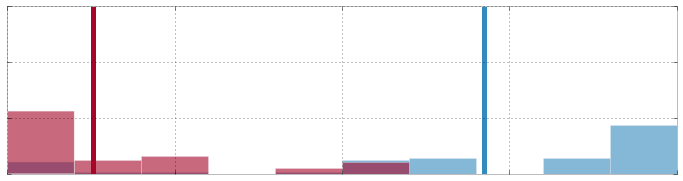

0.352631578947 0.00350877192982


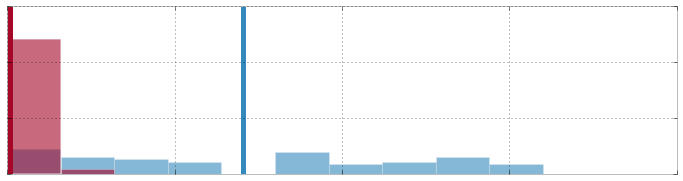

0.228070175439 0.00175438596491


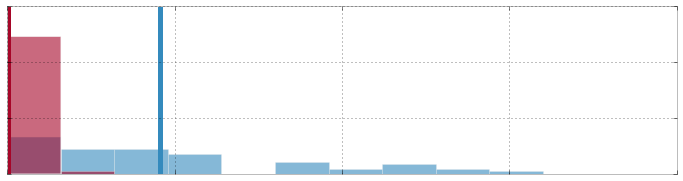

In [175]:
df_50p = pd.DataFrame()
N = d['N'] * 1.0
for col, l in zip(['b50%', 'a50%'], ['MWT', 'WALDO']):
    df_50p[l] = d[col] / N
    
df_50p = pd.DataFrame()
N = d['N'] * 1.0
for col, l in zip(['a50%', 'b50%'], ['WALDO', 'MWT',]):
    df_50p[l] = d[col] / N
    
    
df_90p = pd.DataFrame()
N = d['N'] * 1.0
for col, l in zip(['a90%', 'b90%'], ['WALDO', 'MWT',]):
    df_90p[l] = d[col] / N
    
    
df_99p = pd.DataFrame()
N = d['N'] * 1.0
for col, l in zip(['a99%', 'b99%'], ['WALDO', 'MWT',]):
    df_99p[l] = d[col] / N
    
    
  
    
    
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(axisbg='white')    
color_w = ax._get_lines.color_cycle.next()
color_m = ax._get_lines.color_cycle.next()

df_50p.plot(kind='hist', bins=10,alpha=0.6, ax=ax, colors=[color_w, color_m], normed=True, legend=False)
w, m = df_50p.mean()
ax.plot([w, w], [0, 15], color=color_w, lw=5)
ax.plot([m, m], [0, 15], color=color_m, lw=5)
print(w, m)
plt.yticks([0, 5, 10, 15], [], fontsize=24)
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], [], fontsize=24)
ax.set_ylabel('')
ax.set_ylim([0, 15])

plt.savefig('track_len_50p.eps')
plt.show()


fig = plt.figure(figsize=(12,3))
ax = plt.subplot(axisbg='white')
df_90p.plot(kind='hist', bins=10,alpha=0.6, ax=ax, colors=[color_w, color_m], normed=True, legend=False)
w, m = df_90p.mean()
ax.plot([w, w], [0, 15], color=color_w, lw=5)
ax.plot([m, m], [0, 15], color=color_m, lw=5)
print(w, m)
plt.yticks([0, 5, 10, 15], [], fontsize=24)
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], [], fontsize=24)
ax.set_ylabel('')
ax.set_ylim([0, 15])

plt.savefig('track_len_90.eps')
plt.show()




fig = plt.figure(figsize=(12,3))
ax = plt.subplot(axisbg='white')
df_99p.plot(kind='hist', bins=10,alpha=0.6, ax=ax, colors=[color_w, color_m], normed=True,legend=False )

w, m = df_99p.mean()
ax.plot([w, w], [0, 15], color=color_w, lw=5)
ax.plot([m, m], [0, 15], color=color_m, lw=5)
print(w, m)
plt.yticks([0, 5, 10, 15], [], fontsize=24)
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], [], fontsize=24)
ax.set_ylabel('')
ax.set_ylim([0, 15])
plt.savefig('track_len_99.eps')

plt.show()


In [112]:
d2 = d[d['N'] == 10]
total_n = sum(d2['N'])
total_complete = sum(d2['a50%'])
before_complete= sum(d2['b50%'])

print(total_n, 'worms in recordings of 10 worms')
print(total_complete, 'tracks spanning > 90% of recording')
print(100. * total_complete/ total_n, '% worms completely solved')

print(100. * before_complete/ total_n, '% worms completely solved before waldo')

print(before_complete)
1/4
#1 / 9

260 worms in recordings of 10 worms
190 tracks spanning > 90% of recording
73.0769230769 % worms completely solved
13.0769230769 % worms completely solved before waldo
34


0.25

In [109]:
d2 = d[d['N'] == 10]
total_n = sum(d2['N'])
total_complete = sum(d2['a90%'])
before_complete= sum(d2['b90%'])

print(total_n, 'worms in recordings of 10 worms')
print(total_complete, 'tracks spanning > 90% of recording')
print(100. * total_complete/ total_n, '% worms completely solved')

print(100. * before_complete/ total_n, '% worms completely solved before waldo')

260 worms in recordings of 10 worms
107 tracks spanning > 90% of recording
41.1538461538 % worms completely solved
0.0 % worms completely solved before waldo
inf


In [96]:
total_complete = sum(d2['a99%'])
before_complete= sum(d2['b99%'])

print(total_n, 'worms in recordings of 10 worms')
print(total_complete, 'tracks spanning > 90% of recording')
print(100. * total_complete/ total_n, '% worms completely solved')

print(100. * before_complete/ total_n, '% worms completely solved before waldo')

260 worms in recordings of 10 worms
69 tracks spanning > 90% of recording
26.5384615385 % worms completely solved
0.0 % worms completely solved before waldo


In [119]:
d = pd.DataFrame(dats).set_index('eid')[['N', 'a% mean', 'b% mean']]
a = np.mean(d['a% mean'])
b = np.mean(d['b% mean'])
print(a)
print(b)
d

0.292296497855
0.0310248982981


,N,a% mean,b% mean
eid,,,
20150615_170754,10,0.453969,0.008826
20150608_165523,60,0.070093,0.002400
20150602_112810,9,0.999392,0.726655
20150518_121809,10,0.320505,0.010869
20150615_170759,10,0.587533,0.014929
20150615_124720,10,0.399249,0.014877
20150615_124728,10,0.470694,0.009773
20150515_124736,10,0.123110,0.006647
20150519_170520,10,0.423453,0.010572


In [104]:
d = pd.DataFrame(dats).set_index('eid')[['N', 'total-min', 'a_N_longest', 'b_N_longest']]
before_mean = []
after_mean = []

for eid, row in d.iterrows():
    N = row['N']
    total_min = row['total-min']
    if total_min != 180:
        continue
    #     if N != 10:
    #         continue
    a = row['a_N_longest']
    b = row['b_N_longest']
    print(N, total_min, np.mean(a) / 60.0, np.mean(b) / 60.0)
    after_mean.append(np.mean(a))
    before_mean.append(np.mean(b))
    
print(np.mean(after_mean) / 60.0)
print(np.mean(before_mean) / 60.0)

10 180.0 99.8035231481 3.71638392732
60 180.0 33.2783758715 2.14938120796
10 180.0 88.87939 2.92656882255
10 180.0 179.87491 8.71662807882
10 180.0 74.8579805556 10.2693546243
10 180.0 93.6403684211 7.47577424242
10 180.0 50.2107134409 2.1902635514
10 180.0 170.760908333 9.48993814815
10 180.0 179.585709524 9.21139649123
30 180.0 15.4346068922 3.19206303437
10 180.0 55.3826057292 1.87665978065
10 180.0 19.8748874429 1.25525459021
10 180.0 115.034664444 38.3020944444
10 180.0 44.8625066667 2.96752672798
10 180.0 28.9462283333 12.0069428571
40 180.0 58.0312033033 7.51437390017
10 180.0 48.6555490991 4.27820096386
50 180.0 44.5776549645 5.06980285388
10 180.0 105.282682353 6.79928886719
20 180.0 87.8073755556 6.06607835991
10 180.0 107.961455556 26.7758822917
10 180.0 35.1377909722 6.05974557576
10 180.0 179.732594444 3.9499888764
10 180.0 91.4896692982 4.41715273504
10 180.0 105.845802222 2.62237659989
10 180.0 34.5316813131 1.75366509288
10 180.0 38.2166067376 2.84180738363
10 180.0 89.